In [4]:
import os
import torch
import librosa
import soundfile as sf
from dataset import load_ljspeech_dataset, load_speechcommand_dataset
from model import WaveNet_Mel2Raw
import matplotlib.pyplot as plt
def get_melspectrum(dataset, idx):
    filename = dataset.files[idx]
    y, sr = librosa.load(filename)
    y = librosa.resample(y, orig_sr=sr, target_sr=config.sample_rate)
    mels = torch.tensor(dataset._compute_mel_spec(y))
    return mels

def inference_speech(model, mels, device):
    mels = mels.to(device)
    model.eval()
    return model.inference(mels, device)

In [5]:
from config import Config
config = Config()
result_dir = config.gen_result_folder
if not(os.path.exists(result_dir)):
    os.mkdir(result_dir)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
print(device)

cpu


2.514875283446712


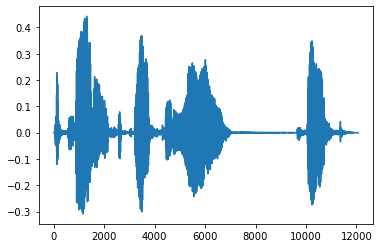

In [6]:
_, testset = load_ljspeech_dataset(config)
# Target audio

import IPython.display as ipd
import librosa

y, sr = librosa.load(testset.files[config.gen_test_idx]); print(len(y)/sr)
y = librosa.resample(y, orig_sr=sr, target_sr=config.sample_rate)
plt.plot(y)
ipd.Audio(y, rate=config.sample_rate)

In [7]:
model = WaveNet_Mel2Raw.create_with(config)
model.load_checkpoint(config.gen_model_cp)
model.to(device)
model.eval()

WaveNet_Mel2Raw(
  (input_conv): Conv1d(1, 120, kernel_size=(1,), stride=(1,))
  (mel_conv): ConvTranspose1d(40, 40, kernel_size=(800,), stride=(64,), padding=(400,))
  (residual_blocks): ModuleList(
    (0): GatedResidualBlock(
      (causal_conv_f): CasualConv1d(
        (conv1d): Conv1d(120, 120, kernel_size=(2,), stride=(1,))
      )
      (causal_conv_g): CasualConv1d(
        (conv1d): Conv1d(120, 120, kernel_size=(2,), stride=(1,))
      )
      (conditional_conv_f): Conv1d(40, 120, kernel_size=(1,), stride=(1,))
      (conditional_conv_g): Conv1d(40, 120, kernel_size=(1,), stride=(1,))
      (skip_conv): Conv1d(120, 240, kernel_size=(1,), stride=(1,))
      (residual_conv): Conv1d(120, 120, kernel_size=(1,), stride=(1,))
      (sigm): Sigmoid()
      (tanh): Tanh()
    )
    (1): GatedResidualBlock(
      (causal_conv_f): CasualConv1d(
        (conv1d): Conv1d(120, 120, kernel_size=(2,), stride=(1,), dilation=(2,))
      )
      (causal_conv_g): CasualConv1d(
        (conv1d): 

In [8]:
mels = get_melspectrum(testset, config.gen_test_idx)
y_hat = inference_speech(model, mels, device)

In [11]:
ipd.Audio(y_hat.cpu()[0,:], rate= config.sample_rate)

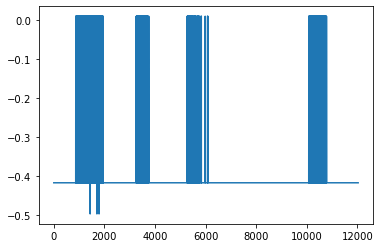

In [12]:
plt.plot(y_hat.cpu()[0,:])

In [13]:
import time
sf.write(os.path.join(config.gen_result_folder, f'TEST_{config.gen_test_idx}_{int(time.time())}.wav'), y_hat.T.cpu().numpy(), config.sample_rate, format='WAV')